In [159]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

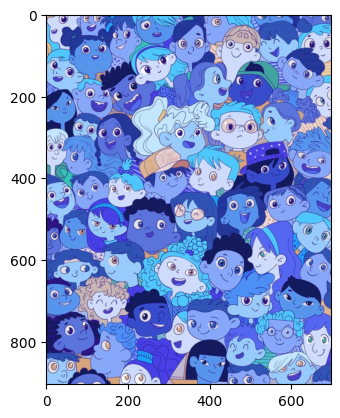

In [ ]:
image = cv2.imread(r'F:\study\project\AIT3005-Midterm\image\1.jpg')
plt.imshow(image)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
object_list = [
    # r"F:\study\project\AIT3005-Midterm\image\ice_cream.jpg",
    # r"F:\study\project\AIT3005-Midterm\image\boat.png",
    # r"F:\study\project\AIT3005-Midterm\image\balloon.png",
    # r"F:\study\project\AIT3005-Midterm\image\car.png",
    # r"F:\study\project\AIT3005-Midterm\image\pony.png",
    # r"F:\study\project\AIT3005-Midterm\image\watermelon.png",
    # r"F:\study\project\AIT3005-Midterm\image\train.png",
    # r"F:\study\project\AIT3005-Midterm\image\cake.png",
    # r"F:\study\project\AIT3005-Midterm\image\duck.png",
    # r"F:\study\project\AIT3005-Midterm\image\grapes.png",
    # r"F:\study\project\AIT3005-Midterm\image\rabbit.png",
    # r"F:\study\project\AIT3005-Midterm\image\strawberry.png",
    # r"F:\study\project\AIT3005-Midterm\image\teddy_bear.png",
    r"F:\study\project\AIT3005-Midterm\image\tennis_ball.png",
    # r"F:\study\project\AIT3005-Midterm\image\tie.png",
]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(59, 59), dtype=uint8)

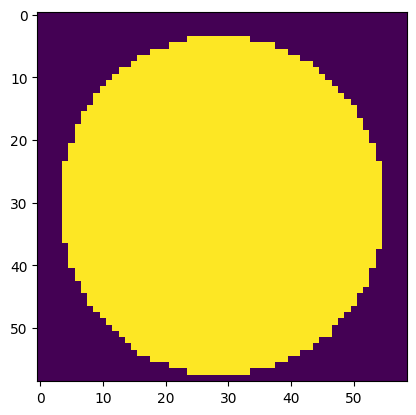

In [162]:
# mask background
def create_mask(template):
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_template, 200, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(mask)
    return mask

create_mask(cv2.imread(object_list[0]))

tennis_ball


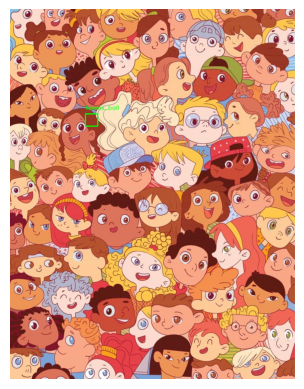

In [ ]:
output_image = image.copy()

scales = np.linspace(0.5, 1, 15)

edges = cv2.Canny(image, 100, 200)

kernel = np.ones((3, 3), np.uint8)

for object_path in object_list:
    file_name = os.path.basename(object_path)
    name = os.path.splitext(file_name)[0]
    print(name)

    template = cv2.imread(object_path)
    # template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    # mask = create_mask(template)

    max_val_global = -1
    best_match_loc = None
    best_resized_template = None

    for scale in scales:
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
        # resized_mask = cv2.resize(mask, (resized_template.shape[1], resized_template.shape[0]))

        eroded_template = cv2.dilate(template, kernel, iterations=1)

        template_edges = cv2.Canny(eroded_template, 100, 200)
        plt.imshow(template_edges)

        result = cv2.matchTemplate(edges, template_edges, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > max_val_global:
            max_val_global = max_val
            best_match_loc = max_loc
            best_resized_template = resized_template

    if best_match_loc is not None:
        top_left = best_match_loc
        bottom_right = (top_left[0] + best_resized_template.shape[1], top_left[1] + best_resized_template.shape[0])
        cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)

        font = cv2.FONT_HERSHEY_SIMPLEX
        text_size = cv2.getTextSize(name, font, 0.5, 1)[0]
        text_x = top_left[0]
        text_y = top_left[1] - 10

        cv2.putText(output_image, name, (text_x, text_y), font, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()